In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

## Lab#3 Asking a statistical question

## Problem 1

In this problem we are looking at 100k 'good' data points from an experiment that come from a gaussian distribution which has a mean of 12 Kelvin and a standard deviation of 0.4 Kelvin. We assume that our equipment has malfunctioned and given us anomalous readings that are not close to the mean as they should be. Our goal is to elminate the 'bad' data.

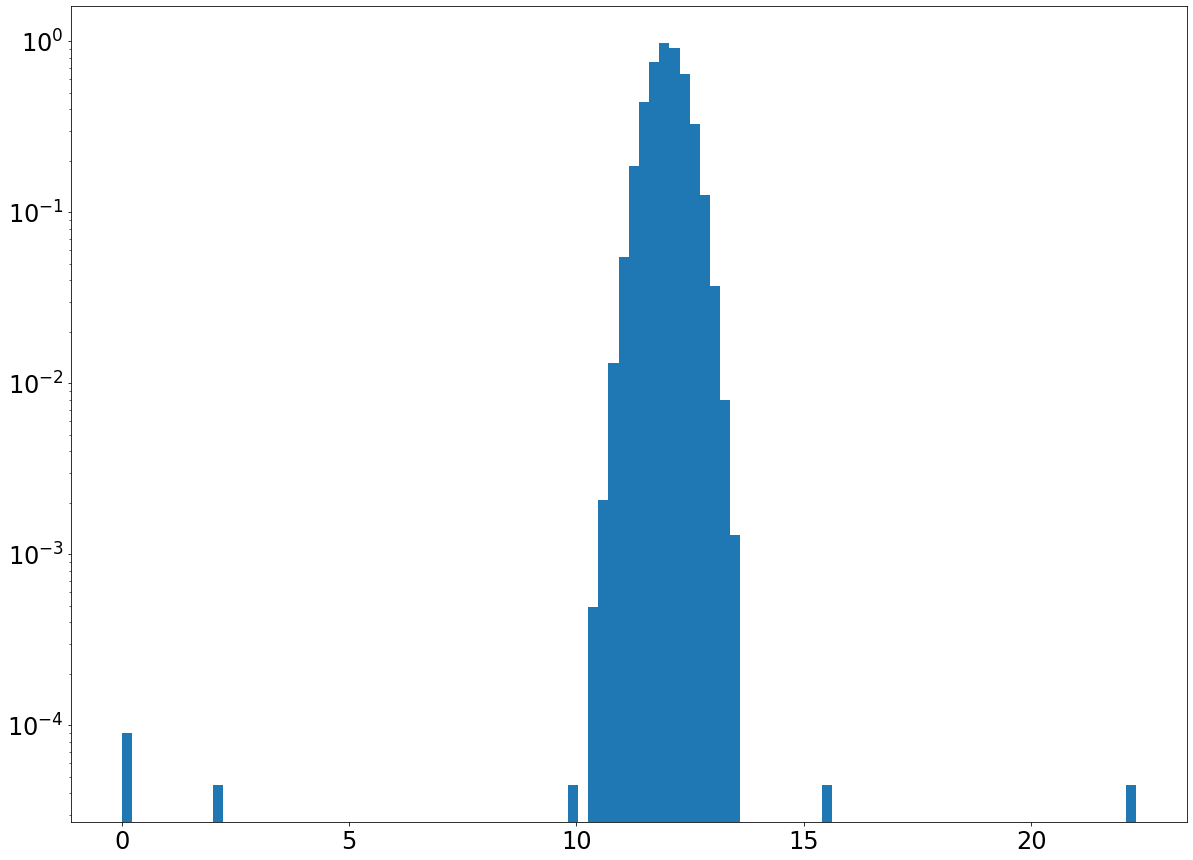

In [45]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

In order to solve our probelm, we ask: At what significance value are we eliminating the most bad points while keeping the most good points?

In order to solve this, we need to determine the minimum commision and emission errors which is the same as finding: 

Min(Comission Error) = Min(Chosen Good intersects True Bad) 

Min(Emission Error) = Min(Chosen Bad intersects True Good)

In [53]:
good = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
bad = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
combined = np.concatenate((good, bad))

In [95]:
def plot_truthtable_counts(sigma_val):
    
    discard = combined[(combined < 12 - sigma_val*0.4) | (combined > 12 + sigma_val*0.4)]
    keep = combined[(combined > 12 - sigma_val*0.4) & (combined < 12 + sigma_val*0.4)]
    
    true_p = len(keep[np.isin(keep, good)])
    false_p = len(keep[np.isin(keep, bad)])
    true_n = len(discard[np.isin(discard, bad)]) + 1
    false_n = len(discard[np.isin(discard, good)])
    counts = [true_p, false_p, true_n, false_n]
    
    print('The commision and omission errors corresponding to ' + str(sigma_val) + ('σ are:'))
    print('Commision errors: ' + str(counts[1]))
    print('Omission errors: ' + str(counts[3]))
    print()
    
    return counts

In [96]:
sigma_vals = np.arange(1, 7, 0.5)
for i in sigma_vals:
    plot_truthtable_counts(i)

The commision and omission errors corresponding to 1.0σ are:
Commision errors: 0
Omission errors: 31598

The commision and omission errors corresponding to 1.5σ are:
Commision errors: 0
Omission errors: 13195

The commision and omission errors corresponding to 2.0σ are:
Commision errors: 1
Omission errors: 4511

The commision and omission errors corresponding to 2.5σ are:
Commision errors: 1
Omission errors: 1230

The commision and omission errors corresponding to 3.0σ are:
Commision errors: 1
Omission errors: 230

The commision and omission errors corresponding to 3.5σ are:
Commision errors: 1
Omission errors: 51

The commision and omission errors corresponding to 4.0σ are:
Commision errors: 1
Omission errors: 9

The commision and omission errors corresponding to 4.5σ are:
Commision errors: 2
Omission errors: 1

The commision and omission errors corresponding to 5.0σ are:
Commision errors: 2
Omission errors: 0

The commision and omission errors corresponding to 5.5σ are:
Commision err

Based on what we see above, we can see that at a significance level of 5σ we have the least amount of errors with only 2 commission errors. One thing to notice is that at a significance level of 1.5σ we have 0 commission errors but a substantial amount of emission errors. Based on this we can conclude that a signigicance level of 5σ is the ideal level to get rid of the most bad data while maintaing the most good data. The truth table according to this is:

In [97]:
chosen = plot_truthtable_counts(5)
table = pd.DataFrame(data=[[chosen[0], chosen[1]], [chosen[3], chosen[2]]], index=['Test Good', 'Test Bad'], columns=['True Good', 'True Bad'])
print(table)

The commision and omission errors corresponding to 5σ are:
Commision errors: 2
Omission errors: 0

           True Good  True Bad
Test Good     100000         2
Test Bad           0         6


The number of omissions decrease as the threshold goes up as we can see from earlier. The relationship can be predicted by fitting an error function to a plot that relates the sigma threshold to the number of omission errors.

On the other hand, the commission error increases as the threshold value increases. The error will always exist since we are only getting an optimal position since an absolute position cannot be found wihtout increasing the omissions as seen above.

## Problem 2

In this problem we will be looking for asteroids. Since the alignment of stars does not line up perfectly due to atmospheric and instrumental effects we model the background distribution as a 2D gaussian with a 1 arcsecond RMS. The plot for the probability for each part that we are looking at looks like:

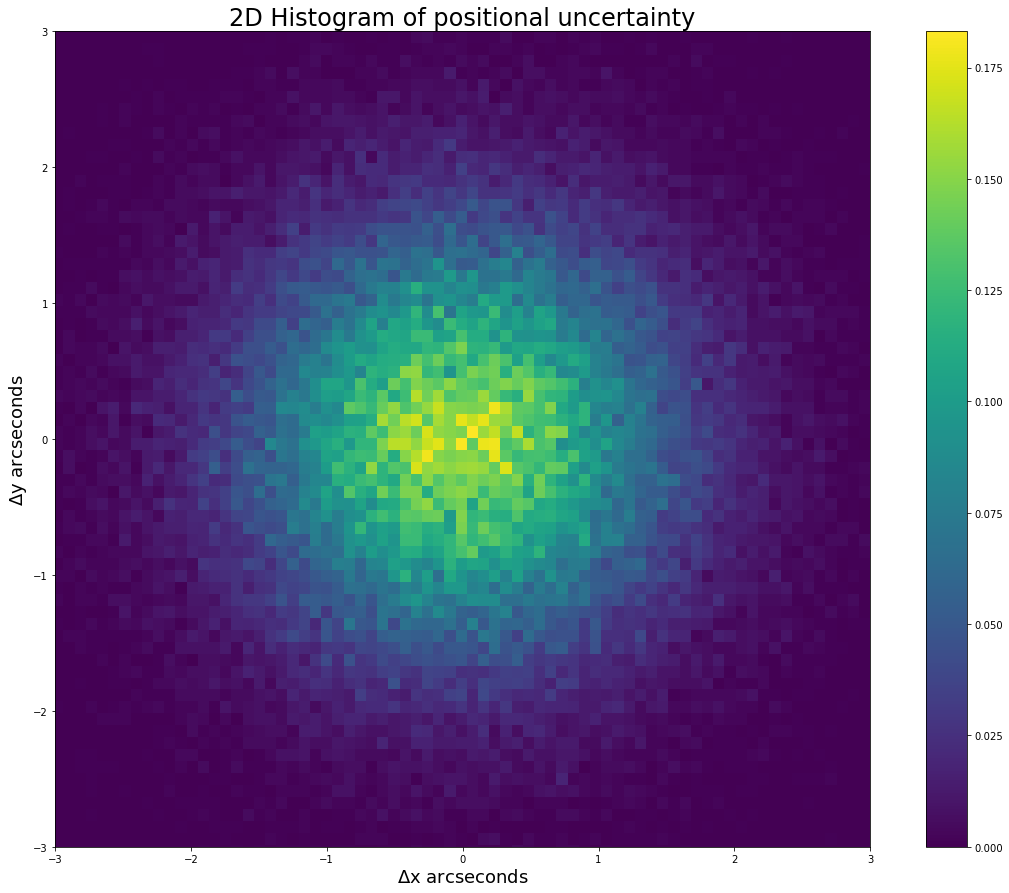

In [2]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

Now, we want to find how much distance would an object have to cover for it to be considered an asteroid with a 5σ confidence level. In order to do so we need to ask: What is the distance that needs to be covered from the origin where the background distribution (2D Gaussian) might produce an observation that has a significance of 5σ?

Now, in order to find the position we need to integrate over the 2D Gaussian which has a pdf of :$$ PDF(x,y) = e^{-0.5(x^2+y^2)}$$

In order to simplify the integral, we can convert to polar coordinates by taking $$r^2 = x^2 + y^2$$ which makes the integrand equal to : $$PDF(r) = e^{-0.5(r^2)}$$

Next, our limits for the integral would go from r = a to r = ∞. Finally, we can translate our question to math and find the value for a that gives us a significance of 5σ : $$P(a<r<{\infty}) = 2.867x10^{-7} $$ which is the probability associated with a significance of 5σ.

Before we try and solve this, we need to find the value for the probability distribution when we integrate over our desired region. Going back to our integrand in polar coordinates, if we integrate it from a to any point p we get : $$P(a<r<p) = a_{p}re^{-0.5r^2}$$

By doing this we can see that our background actually represents a rayleigh distribution which we can now use to find the value of a which gives us a significance of 5σ

In [6]:
background = stats.rayleigh(scale=1)
dist = background.ppf(stats.norm(scale=1).cdf(5))
print('The value of a that corresponds to a significance of 5σ is: ' + str(dist) + ' arcseconds')

The value of a that corresponds to a significance of 5σ is: 5.489079776034238 arcseconds


## Problem 3

In this problem, we see a cosmic rate of 1 cosmic ray per minute when observing a moon sized patch in the sky. If we can observe for all 8 hours per night then we expect to see 8*60 = 480 cosmic rays per night. Since we are observing a fixed number of events over a time interval, we can say that our distribution can be represented by a Poisson distribution with a mean of 480. Now, since we are also observing over a period of 15 days the total number of rays that we can observe are 480*15 = 7200 cosmic rays. Now, our overall background distribution is also a Poisson distribution but with a mean of 7200. This occurs since we need to convolve the distribution over 15 days, but since the convolution of a Poisson distribution is still a Poisson distribution, but with the initial mean multiplied by the number of convolutions we get our new background.

(1e-08, 1)

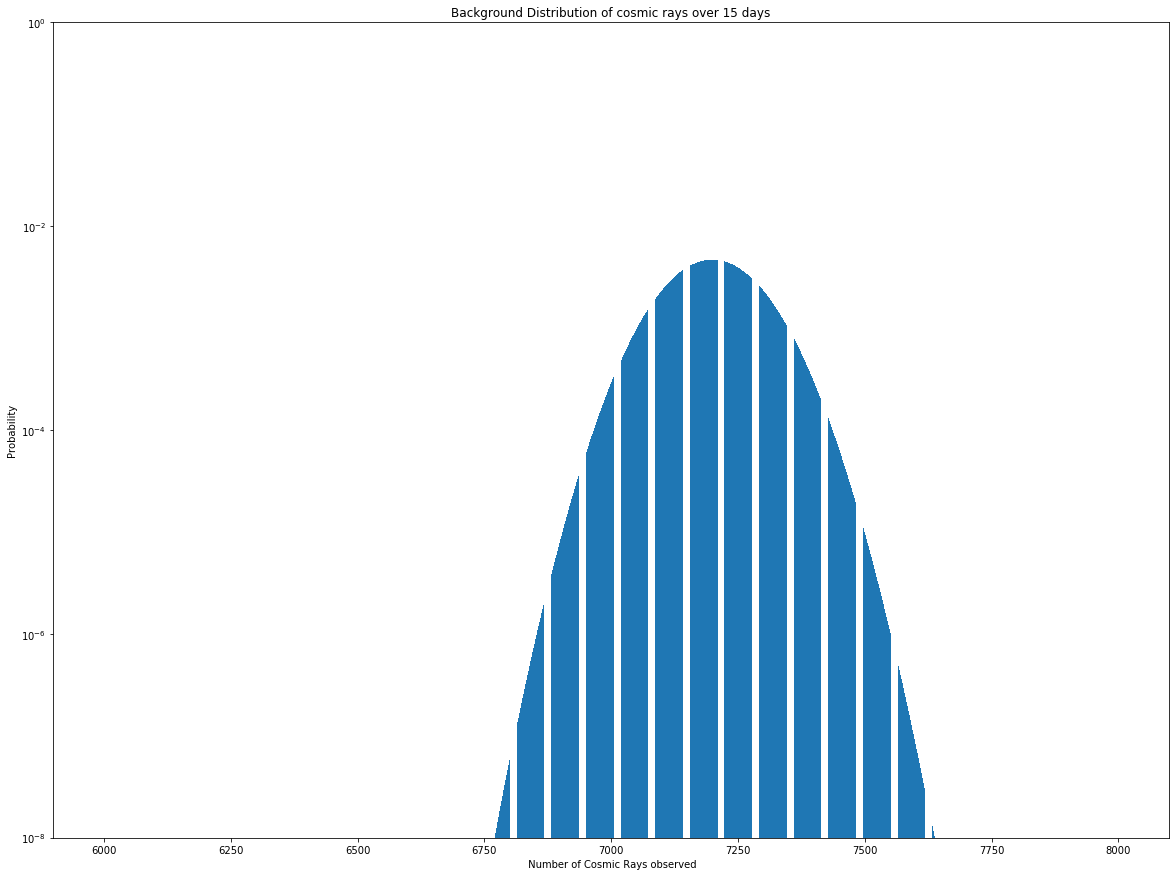

In [43]:
background_2 = stats.poisson(7200)
x = np.arange(6000, 8000)
pmf = background_2.pmf(x)

plt.title('Background Distribution of cosmic rays over 15 days')
plt.xlabel(' Number of Cosmic Rays observed')
plt.ylabel('Probability')
plt.bar(x, pmf)
plt.yscale('log')
plt.ylim(1e-8, 1)

Now, lets say that we observe 6800 cosmic rays over the 15 day period while looking into the patch. We ask: What is the probability that the background distribution produced 6800 or less cosmic rays over the 15 day interval?
To solve this all we need to do is integrate the background distribution from 0 to 6800, and then find its sigma value.

The mathematical representation for this would be: $$ \int_{0}^{6800} \frac{7200^{k}e^{-7200}}{k!} \,dk$$

In [39]:
p = background_2.cdf(6800)
print('The probability that we are looking for is: ' + str(p))

The probability that we are looking for is: 1.0133280183917768e-06


In [44]:
s = stats.norm.ppf(1-p)
print('The sigma value associates to this probability is: ' + str(s))

The sigma value associates to this probability is: 4.750747965778662


While our significance comes close to 5σ, it is still not enough to ascertain a discovery.


One thing to notice is the almost gaussian shape of the background distribution which can be attributed to the large mean of the poisson distribution. Similarly, we must be careful when trying to understand what we are looking for since a stronger signal would indicate a lack of an object in the patch as more signals can be captured and a weaker signal would lead us to believe that there is an object blocking the signals. Hence we must integrate from 0 to 6800 instead of from 6800 to infinity. 